In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import logging
import numpy as np
import py21cmfast as p21c
import math
from py21cmfast import (
    AstroParams,
    CosmoParams,
    FlagOptions,
    UserParams,
    determine_halo_list,
    initial_conditions,
    perturb_field,
    plotting
    )

/opt/anaconda3/envs/21cmfast/lib/python3.9/site-packages/py21cmfast/_cfg.py:49: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/opt/anaconda3/envs/21cmfast/lib/python3.9/site-packages/py21cmfast/_cfg.py:33: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [5]:
p21c.UserParams?

# Find halo locations, overplot onto density field

In [3]:
# Define user_params using UserParams(), flag_options with FlagOptions, astro_params with AstroParams
# Perturb field to redshift z = 8, obtain the halo list corresponding to this perturbed box, overplot onto
# density plot
'''
user_params = UserParams(
    BOX_LEN=200, 
    HII_DIM=150,
    HMF=1,
    USE_INTERPOLATION_TABLES=True,
    PERTURB_ON_HIGH_RES=True,
    )

flag_options = FlagOptions(
    USE_MASS_DEPENDENT_ZETA=True,
    #USE_HALO_FIELD=True
    )

random_seed = 1234


cosmo_params = CosmoParams(
    SIGMA_8=0.82, 
    hlittle=0.6774
    )

astro_params = AstroParams(
    HII_EFF_FACTOR=25.0,
    ALPHA_ESC=-0.5,
    ALPHA_STAR=0.5,
    F_ESC10=-1.30102999566,
    F_STAR10=-1.0,
    L_X=40.5,
    M_TURN=8.7,
    NU_X_THRESH=500.0,
    X_RAY_SPEC_INDEX=1.0,
    t_STAR=0.5,
    R_BUBBLE_MAX=15.0,
    )


init_box = initial_conditions(
    user_params=user_params,
    #cosmo_params=cosmo_params,
    random_seed=random_seed,
    regenerate=True,
    write=False,
    )
'''

# Init cond for .h5 file

HII_DIM = 128
BOX_LEN = 128

init_cond = p21c.initial_conditions(
    user_params = {"HII_DIM": HII_DIM, "BOX_LEN": BOX_LEN}, 
    cosmo_params = p21c.CosmoParams(SIGMA_8 = 0.8), 
    random_seed = 42242)
    
redshift = 8.0

pt_box = perturb_field(
    redshift=redshift,
    init_boxes=init_cond,
    #user_params=user_params,
    #cosmo_params=cosmo_params,
    )

halos = determine_halo_list(
    redshift=redshift,
    init_boxes=init_cond,
    #user_params=user_params, 
    #cosmo_params=cosmo_params,
    #astro_params=astro_params,
    #flag_options=flag_options,
    regenerate=True,
    write=False,
    OPTIMIZE=False,
    )

list_halo_coords = halos.halo_coords

/opt/anaconda3/envs/21cmfast/lib/python3.9/site-packages/py21cmfast/inputs.py:485: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


In [5]:
# now ionize the perturbed box at redshift = 8
ionized_box=p21c.ionize_box(perturbed_field = pt_box)

/opt/anaconda3/envs/21cmfast/lib/python3.9/site-packages/py21cmfast/plotting.py:101: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(slc, origin="lower", cmap=cmap, norm=norm, **imshow_kw)


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='y-axis [Mpc]', ylabel='z-axis [Mpc]'>)

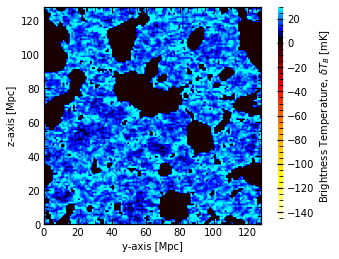

In [6]:
# We want to plot the recovered bubbles, with the masses overplotted on a colour scale
# corresponding to mass (redshift = 8)

brightness_temp=p21c.brightness_temperature(ionized_box=ionized_box, perturbed_field=pt_box)
p21c.plotting.coeval_sliceplot(brightness_temp, slice_index=0, slice_axis=0)

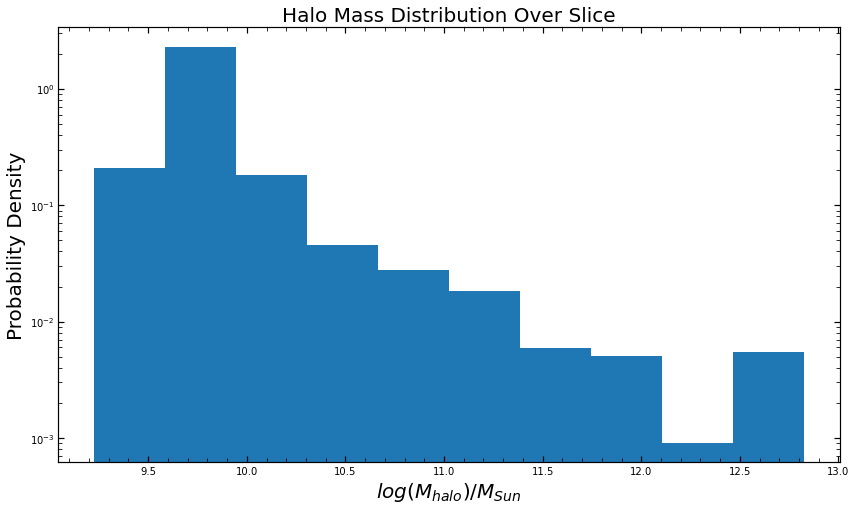

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
halo_masses_slice = halos.halo_masses[halos.halo_coords[:,2]==0]
log_halo_masses=np.log10(halo_masses_slice)
ax.hist(log_halo_masses,density=True)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$log(M_{halo}) / M_{Sun}$', fontsize = 20)
ax.set_title('Halo Mass Distribution Over Slice', fontsize = 20)
ax.set_ylabel('Probability Density', fontsize = 20);

In [19]:
brightness_temp.brightness_temp.shape

(128, 128, 128)

In [10]:
# List of sorted (in ascending mass) halo masses and corresponding indices, sort the halo_coords using use

halo_masses_cube = halos.halo_masses
sorted_halo_masses = np.sort(halo_masses_cube)
sorted_halo_masses_inds = np.argsort(halo_masses_cube)
sorted_halo_coords = halos.halo_coords[sorted_halo_masses_inds]

In [17]:
sorted_halo_mass_inds = np.argsort(halo_masses_cube)
sorted_halo_mass = halo_masses_cube[sorted_halo_mass_inds]
print(sorted_halo_mass)
print(sorted_halo_masses)

[1.6756543e+09 1.6756543e+09 1.6756543e+09 ... 6.6888044e+12 6.6888044e+12
 6.6888044e+12]
[1.6756543e+09 1.6756543e+09 1.6756543e+09 ... 6.6888044e+12 6.6888044e+12
 6.6888044e+12]


In [35]:
# List of sorted slice masses, corresponding coordinates

halo_masses_slice = halos.halo_masses[halos.halo_coords[:,2]==0]
sorted_halo_masses_slice = np.sort(halo_masses_slice)
sorted_halo_masses_inds_slice = np.argsort(halo_masses_slice)
halo_coords_slice = halos.halo_coords[halos.halo_coords[:,2]==0]
sorted_halo_coords_slice = halo_coords_slice[sorted_halo_masses_inds_slice]

In [60]:
# Number of unique elements in slice

unique_slice_elements, unique_slice_elem_counts = np.unique(sorted_halo_masses_slice, return_counts=True)
for i in range(len(unique_slice_elements)):
    print('Mass: ' + repr(unique_slice_elements[i]/1e10)+ r" 10^{10} $M_{sun}$, with count: " + repr(unique_slice_elem_counts[i]))

Mass: 0.3746002688 10^{10} $M_{sun}$, with count: 505
Mass: 0.498593024 10^{10} $M_{sun}$, with count: 608
Mass: 0.6636274176 10^{10} $M_{sun}$, with count: 613
Mass: 0.8832882688 10^{10} $M_{sun}$, with count: 671
Mass: 1.1756566528 10^{10} $M_{sun}$, with count: 12995
Mass: 1.5647991808 10^{10} $M_{sun}$, with count: 130
Mass: 2.0827480064 10^{10} $M_{sun}$, with count: 142
Mass: 2.7721377792 10^{10} $M_{sun}$, with count: 126
Mass: 3.689715712 10^{10} $M_{sun}$, with count: 855
Mass: 4.91101184 10^{10} $M_{sun}$, with count: 65
Mass: 6.5365569536 10^{10} $M_{sun}$, with count: 140
Mass: 8.7001587712 10^{10} $M_{sun}$, with count: 148
Mass: 11.579912192 10^{10} $M_{sun}$, with count: 25
Mass: 15.412862976 10^{10} $M_{sun}$, with count: 137
Mass: 20.514521088 10^{10} $M_{sun}$, with count: 35
Mass: 27.304828928 10^{10} $M_{sun}$, with count: 47
Mass: 36.3427233792 10^{10} $M_{sun}$, with count: 47
Mass: 48.3721641984 10^{10} $M_{sun}$, with count: 19
Mass: 64.3833593856 10^{10} $M_{su

In [40]:
# Indices to break up the masses into percentile mass binnings

num_slice_masses = len(sorted_halo_masses_slice)
group1_index = math.floor(num_slice_masses*10/100) # bottom 10%
group2_index = math.floor(num_slice_masses*98/100) # 10-98%, so final group will just be top 2% halo masses

group1 = sorted_halo_coords_slice[:group1_index]
group2 = sorted_halo_coords_slice[group1_index:group2_index]
group3 = sorted_halo_coords_slice[group2_index:]

In [43]:
def vox_to_dist(box_len, HII_dim, vox_coords):
    dim = HII_dim*3
    dist_coords = (box_len/dim)*vox_coords #+ (box_len/dim)/2
    return dist_coords

group1_dist = vox_to_dist(BOX_LEN, HII_DIM, group1)
group2_dist = vox_to_dist(BOX_LEN, HII_DIM, group2)
group3_dist = vox_to_dist(BOX_LEN, HII_DIM, group3)

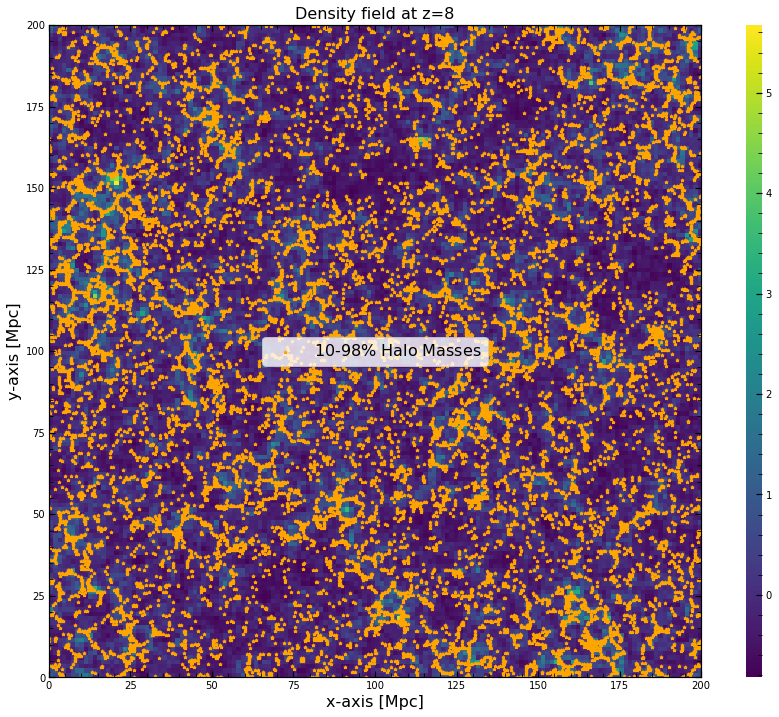

In [48]:
fig, ax = plt.subplots(figsize=(16, 12))
#ax.scatter(group1_dist[:,0], group1_dist[:,1], s=10,  marker='*',color='r', label='Bottom 10$\%$ Halo Masses')
ax.scatter(group2_dist[:,0], group2_dist[:,1], s=10,  marker='*',color='orange',label='10-98$\%$ Halo Masses')
#ax.scatter(group3_dist[:,0], group3_dist[:,1], s=10,  marker='*', color='pink',label='Top 2$\%$ Halo Masses')
#ax.scatter(dist_halo_coords_sec_ten[:,0], dist_halo_coords_sec_ten[:,1], s=10,  marker='*',color='white', label='Top 10$\%$ Halo Masses')
ax.legend(fontsize=16)
#ax.set_xlim(0,50)
ax.set_ylabel('z-axis [Mpc]',fontsize=16)
ax.set_xlabel('y-axis [Mpc]',fontsize=16)
#ax.set_ylim(bottom=0,top=50)
ax.set_title('Density field at z=8', fontsize=16)
plotting.coeval_sliceplot(pt_box,kind='density',ax=ax,fig=fig);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/092021/halo_10_98_percentile_binning_z_8.jpeg')

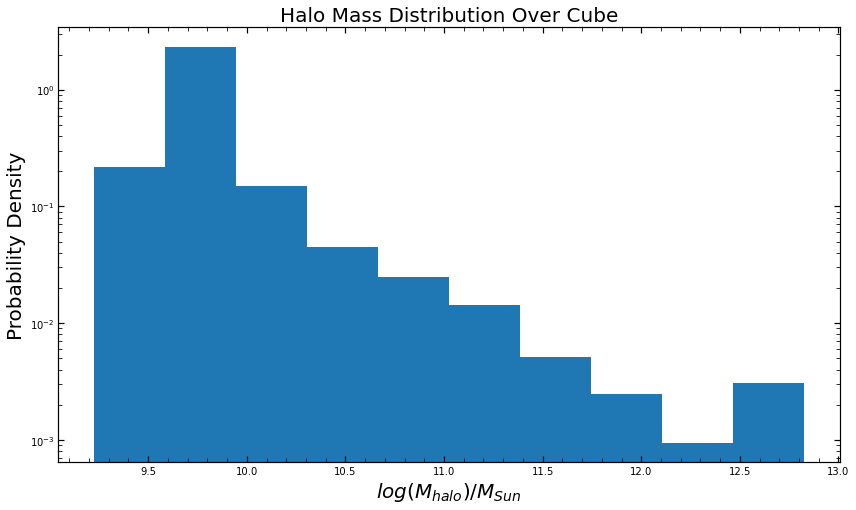

In [11]:
# Now we want to plot a histogram of the masses (over the whole box/slice depending on masses we put in)

fig, ax = plt.subplots(figsize=(14,8))
log_halo_masses=np.log10(halo_masses_cube)
ax.hist(log_halo_masses,density=True)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$log(M_{halo}) / M_{Sun}$', fontsize = 20)
ax.set_title('Halo Mass Distribution Over Cube', fontsize = 20)
ax.set_ylabel('Probability Density', fontsize = 20);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/092021/slice_halo_mass_distribution_logspace.jpeg')

In [13]:
# Now ionize this box, so we can again overplot our halos to see where they are relative to ionized bubbles

ionized=p21c.ionize_box(perturbed_field = pt_box)

In [29]:
# Function to get neutral/ionized coords and indices to plot mass distribution function

def get_neutral_coords(halo_low_res_coords, ionized_box):
    neutral_halo_coords = []
    neutral_halo_inds = []
    ionized_halo_coords = []
    ionized_halo_inds = []
    for i in range(len(halo_low_res_coords)):
        x = halo_low_res_coords[i][0]
        y = halo_low_res_coords[i][1]
        z = halo_low_res_coords[i][2]
        if ionized_box[x,y,z] > 0.9: # check if neutral fraction greater than 0.9
            neutral_halo_coords.append(np.array([x,y,z]))
            neutral_halo_inds += [i]
        else: # not completely neutral, therefore partially ionized
            ionized_halo_coords.append(np.array([x,y,z]))
            ionized_halo_inds += [i]
    return np.array(neutral_halo_coords),np.array(neutral_halo_inds), np.array(ionized_halo_coords), np.array(ionized_halo_inds)

In [30]:
# Now compute neutral, ionized coords, indices for whole cube

halo_coords_low_res = sorted_halo_coords // 3 # do floor division to go from high to lowres
ionized_box = ionized.xH_box # whole ionized box
neutral_halo_coords_box, neutral_halo_inds_box, ionized_halo_coords_box, ionized_halo_inds_box = get_neutral_coords(halo_coords_low_res, ionized_box)                                                                                                                                                                                                                                  
                       

In [31]:
# Now get the neutral and ionized halo masses from the above indices

neutral_halo_masses = sorted_halo_masses[neutral_halo_inds_box]
ionized_halo_masses = sorted_halo_masses[ionized_halo_inds_box]

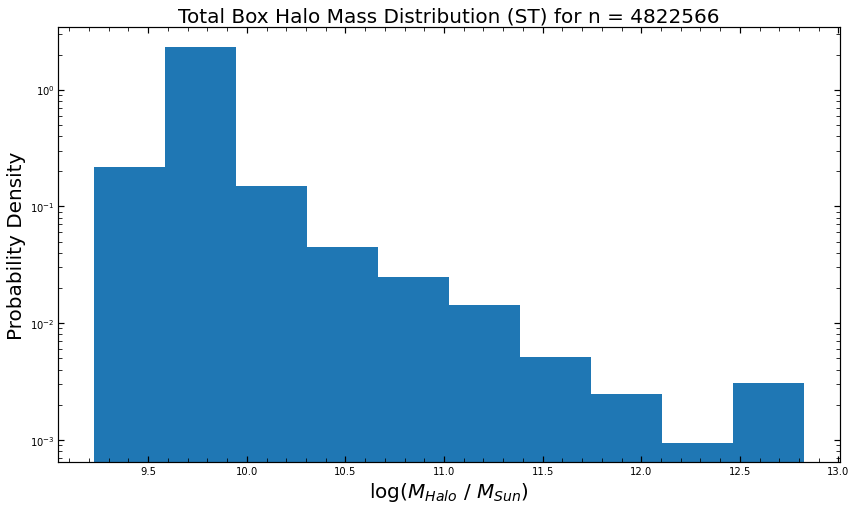

In [35]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(np.log10(sorted_halo_masses),density=True)#, bins=1000)#, density=True)
ax.set_yscale('log')
#ax[0].set_xscale('log')
ax.set_xlabel('log($M_{Halo}$ / $M_{Sun}$)', fontsize = 20)
ax.set_title('Total Box Halo Mass Distribution (ST)' + ' for n = ' + repr(len(sorted_halo_masses)), fontsize = 20)
ax.set_ylabel('Probability Density', fontsize = 20);
fig.savefig('correct_box_tot_dist.jpeg')

In [26]:
# Get neutral/ionized halo coords in 450x450x450 box and their masses

n_halo_coords_box = []
i_halo_coords_box = []
n_halo_masses_box = []
i_halo_masses_box = []
box_halo_coords_high_res = sorted_halo_coords # still only x, y but high res
box_sorted_halo_masses = sorted_halo_masses

for i in neutral_halo_inds_box:
    n_halo_coords_box.append(box_halo_coords_high_res[i])
    n_halo_masses_box += [box_sorted_halo_masses[i]]
for j in ionized_halo_inds_box:
    i_halo_coords_box.append(box_halo_coords_high_res[j])    
    i_halo_masses_box += [box_sorted_halo_masses[j]]
    
n_halo_coords_box = np.array(n_halo_coords_box)
i_halo_coords_box = np.array(i_halo_coords_box)
n_halo_masses_box = np.array(n_halo_masses_box)
i_halo_masses_box = np.array(i_halo_masses_box)

In [95]:
print(n_halo_masses_box)

[3.7460027e+09 3.7460027e+09 3.7460027e+09 ... 6.3415900e+12 6.3415900e+12
 6.3415900e+12]


In [71]:
# convert the list to numpy arrays

n_halo_coords_slice = np.array(n_halo_coords_slice)
i_halo_coords_slice = np.array(i_halo_coords_slice)
n_halo_masses_slice = np.array(n_halo_masses_slice)
i_halo_masses_slice = np.array(i_halo_masses_slice)

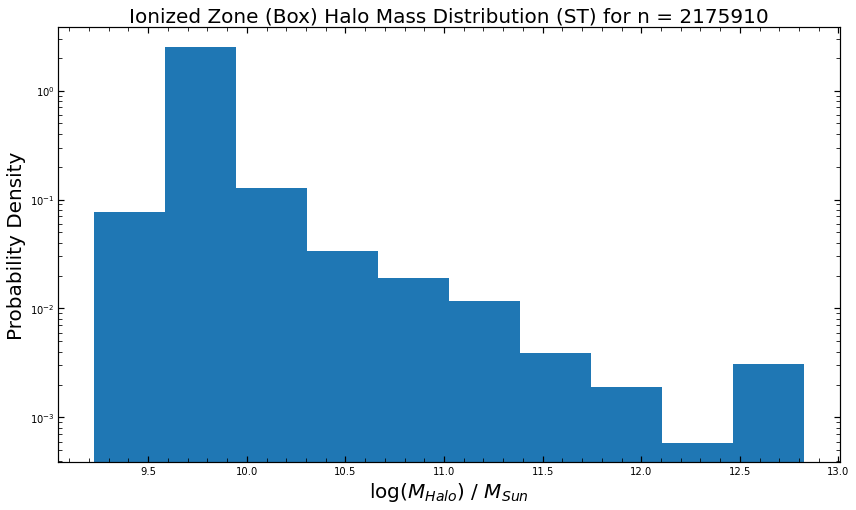

In [27]:
# Now we want to plot a histogram of the ionized and neutral halo masses

fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(np.log10(i_halo_masses_box),density=True)#, bins=1000)#, density=True)
ax.set_yscale('log')
#ax[0].set_xscale('log')
ax.set_xlabel('log($M_{Halo}$) / $M_{Sun}$', fontsize = 20)
ax.set_title('Ionized Zone (Box) Halo Mass Distribution (ST)' + ' for n = ' + repr(len(i_halo_masses_box)), fontsize = 20)
ax.set_ylabel('Probability Density', fontsize = 20);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/091321/neutral_halo_mass_distribution.jpeg')
#ax[1].hist(np.log10(ionized_halo_masses),density=True)#, bins=1000)#, density=True)
#ax[1].set_yscale('log')
#ax[1].set_xscale('log')
#ax[1].set_xlabel('log($M_{Halo}$) / $M_{Sun}$', fontsize = 20)
#ax[1].set_title('Ionized Zone Halo Mass Distribution (ST)', fontsize = 20)
#ax[1].set_ylabel('Probability Density', fontsize = 20);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/092021/ionized_zone_box_halo_mass_distribution.jpeg')

In [6]:
first_group = sorted_halo_coords[:first_slice_index]
sec_group = sorted_halo_coords[first_slice_index:sec_slice_index]
third_group = sorted_halo_coords[sec_slice_index:third_slice_index]
fourth_group = sorted_halo_coords[third_slice_index:]

In [7]:
slice_first_group = first_group[first_group[:,2]==0]
slice_sec_group = sec_group[sec_group[:,2]==0]
slice_third_group = third_group[third_group[:,2]==0]
slice_fourth_group = fourth_group[fourth_group[:,2]==0]

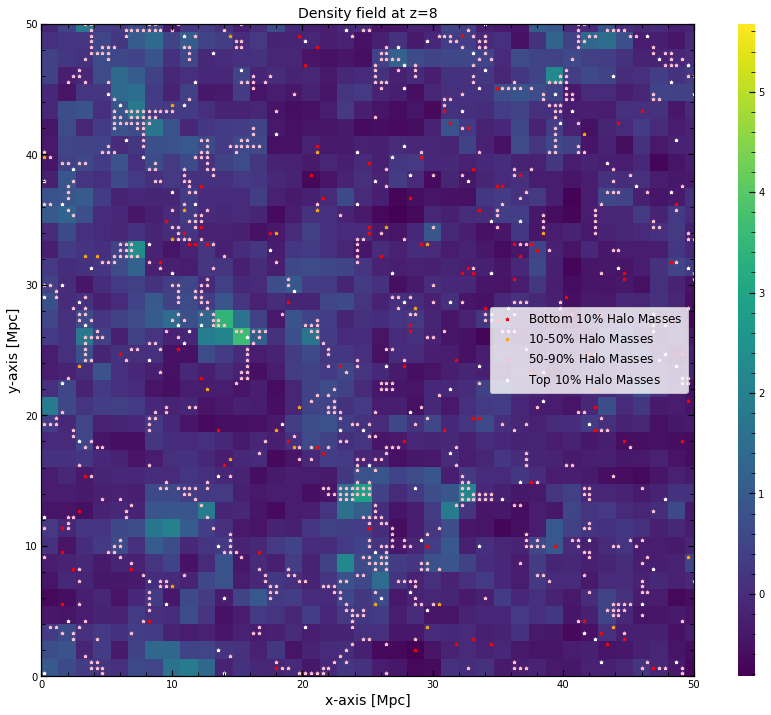

In [8]:
dist_halo_coords_first_ten = vox_to_dist(BOX_LEN, HII_DIM, slice_first_group)
dist_halo_coords_first_fourty = vox_to_dist(BOX_LEN, HII_DIM, slice_sec_group)
dist_halo_coords_sec_fourty = vox_to_dist(BOX_LEN, HII_DIM, slice_third_group)
dist_halo_coords_sec_ten = vox_to_dist(BOX_LEN, HII_DIM, slice_fourth_group)

fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(dist_halo_coords_first_ten[:,0], dist_halo_coords_first_ten[:,1], s=10,  marker='*',color='r', label='Bottom 10$\%$ Halo Masses')
ax.scatter(dist_halo_coords_first_fourty[:,0], dist_halo_coords_first_fourty[:,1], s=10,  marker='*',color='orange',label='10-50$\%$ Halo Masses')
ax.scatter(dist_halo_coords_sec_fourty[:,0], dist_halo_coords_sec_fourty[:,1], s=10,  marker='*', color='pink',label='50-90$\%$ Halo Masses')
ax.scatter(dist_halo_coords_sec_ten[:,0], dist_halo_coords_sec_ten[:,1], s=10,  marker='*',color='white', label='Top 10$\%$ Halo Masses')
ax.legend(fontsize=12)
ax.set_xlim(0,50)
ax.set_ylabel('y-axis [Mpc]',fontsize=14)
ax.set_xlabel('x-axis [Mpc]',fontsize=14)
ax.set_ylim(bottom=0,top=50)
ax.set_title('Density field at z=8', fontsize=14)
plotting.coeval_sliceplot(pt_box,kind='density',ax=ax,fig=fig);

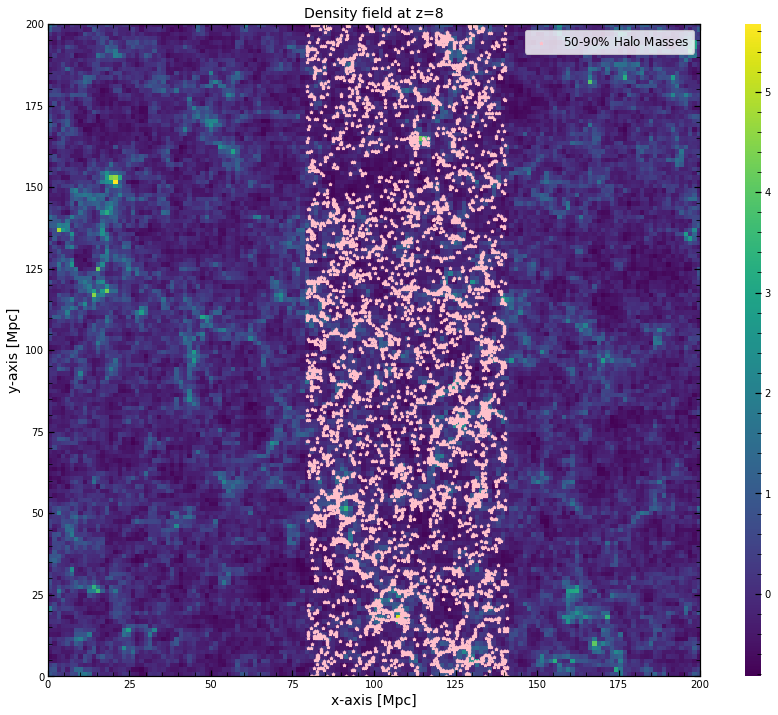

In [268]:
BOX_LEN = 200
HII_DIM = 150.0 # HII_DIM*3 = DIM
dist_halo_coords_first_ten = vox_to_dist(BOX_LEN, HII_DIM, slice_first_ten_percent_halo_coords)
dist_halo_coords_first_fourty = vox_to_dist(BOX_LEN, HII_DIM, slice_first_fourty_percent_halo_coords)
dist_halo_coords_sec_fourty = vox_to_dist(BOX_LEN, HII_DIM, slice_sec_fourty_percent_halo_coords)
dist_halo_coords_sec_ten = vox_to_dist(BOX_LEN, HII_DIM, slice_sec_ten_percent_halo_coords)

#dist_halo_coords_mass12 = (BOX_LEN / (HII_DIM*3)) * slice_halo_coords_mass12 + (BOX_LEN / (HII_DIM*3))/2
#dist_halo_coords_mass13 = (BOX_LEN / (HII_DIM*3)) * slice_halo_coords_mass13 + (BOX_LEN / (HII_DIM*3))/2

fig, ax = plt.subplots(figsize=(16, 12))
#ax.scatter(dist_halo_coords_first_ten[:,0], dist_halo_coords_first_ten[:,1], s=10,  marker='*',color='r', label='Bottom 10$\%$ Halo Masses')
#ax.scatter(dist_halo_coords_first_fourty[:,0], dist_halo_coords_first_fourty[:,1], s=10,  marker='*',color='orange',label='10-50$\%$ Halo Masses')
ax.scatter(dist_halo_coords_sec_fourty[:,0], dist_halo_coords_sec_fourty[:,1], s=10,  marker='*', color='pink',label='50-90$\%$ Halo Masses')
#ax.scatter(dist_halo_coords_sec_ten[:,0], dist_halo_coords_sec_ten[:,1], s=10,  marker='*',color='white', label='Top 10$\%$ Halo Masses')
ax.legend(fontsize=12)
#ax.set_xlim(0,50)
ax.set_ylabel('y-axis [Mpc]',fontsize=14)
ax.set_xlabel('x-axis [Mpc]',fontsize=14)
#ax.set_ylim(bottom=0,top=50)
ax.set_title('Density field at z=8', fontsize=14)
plotting.coeval_sliceplot(pt_box,kind='density',ax=ax,fig=fig);

In [7]:
#lowest_ten_index=len(halo_masses_to_sort)

In [14]:
# Make function to convert from voxel coordinates into distance coordinates

def vox_to_dist(box_len, HII_dim, vox_coords):
    dim = HII_dim*3
    dist_coords = (box_len/dim)*vox_coords #+ (box_len/dim)/2
    return dist_coords

Now that we have a list of the halo coordinates, we can overplot them onto a density field. 
When we are plotting a coeval_sliceplot we are showing a 2-D image (1 cell deep), 
therefore need to choose the halo coordinates to overplot. We do this by knowing the default index slice is 0,
and slice axis is along z-axis, so we simply filter our halo coordinates to only include those with z=0.
Now, given we are plotting a cross-sectional slice with units of Mpc, need to multiply by a factor to convert
the box number coordinates into distance coordinates; to convert from Box
coordinates to Mpc we do $\frac{\text{Box Length} [Mpc]}{\text{Dimension of Box} [No. Boxes]} * (\text{Box Number}) + \frac{\text{Box Length} [Mpc]}{2*\text{Dimension of Box} [No. Boxes]}$ to ensure Box Number = 0 shows up (given 0-index and taking $\text{Dimension of Box} = \text{HII Dimension} * 3$).

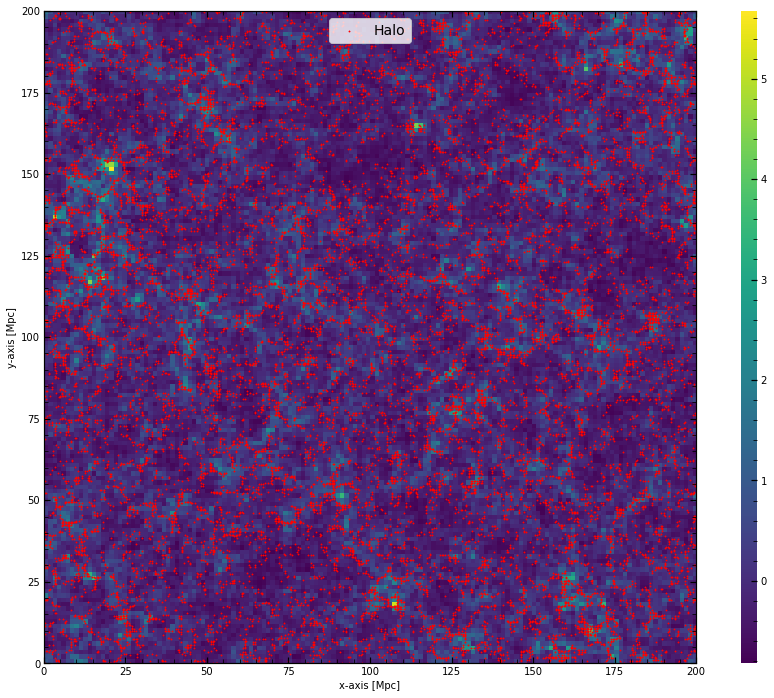

In [15]:
# Do the filtering of halo coords and box number to distance conversion, overplot onto coeval sliceplot


flat_halo_coords = list_halo_coords[list_halo_coords[:,2]==0]
dist_halo_coords = vox_to_dist(BOX_LEN, HII_DIM, flat_halo_coords)

fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(dist_halo_coords[:,0], dist_halo_coords[:,1], s=1, c='red', marker='*', label='Halo')
ax.legend(fontsize=14)
plotting.coeval_sliceplot(pt_box,kind='density',ax=ax,fig=fig);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/high_res_halo_plot.jpeg')

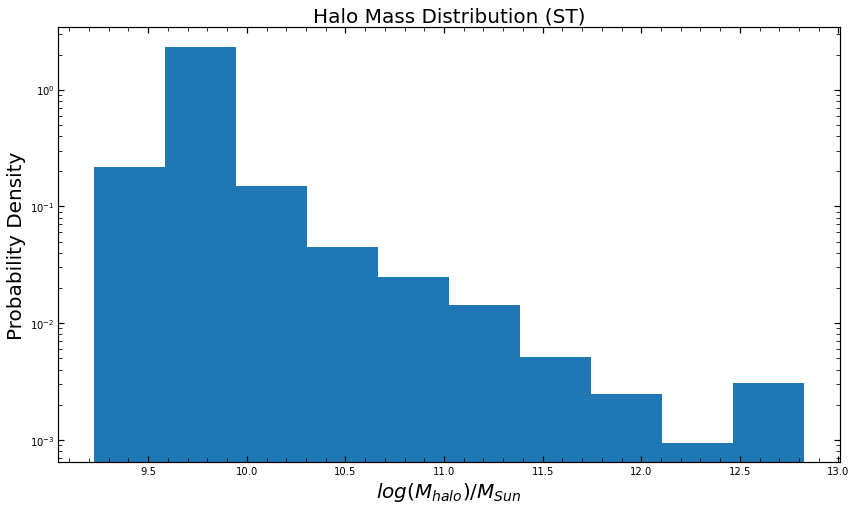

In [36]:
# Now we want to plot a histogram of the masses (over the whole box)

fig, ax = plt.subplots(figsize=(14,8))
halo_masses = halos.halo_masses
log_halo_masses=np.log10(halo_masses)
ax.hist(log_halo_masses,density=True)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$log(M_{halo}) / M_{Sun}$', fontsize = 20)
ax.set_title('Halo Mass Distribution (ST)', fontsize = 20)
ax.set_ylabel('Probability Density', fontsize = 20);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/092021/total_halo_mass_distribution_logspace.jpeg')

In [18]:
# Easier to visualize over a single slice due to smaller number of total haloes, take only z=0 slice
'''
fig, ax = plt.subplots(figsize=(12, 8))
slice_halo_masses = halos.halo_masses[halos.halo_coords[:,2]==0]
slice_log_halo_masses = np.log10(slice_halo_masses)
ax.hist(slice_log_halo_masses)#, bins=1000),density=True)
ax.set_xlabel('$M_{Sun}$', fontsize = 14)
ax.set_ylabel('Number of Halos', fontsize = 14)
ax.set_xscale('log')
ax.set_yscale('log')
'''

"\nfig, ax = plt.subplots(figsize=(12, 8))\nslice_halo_masses = halos.halo_masses[halos.halo_coords[:,2]==0]\nslice_log_halo_masses = np.log10(slice_halo_masses)\nax.hist(slice_log_halo_masses)#, bins=1000),density=True)\nax.set_xlabel('$M_{Sun}$', fontsize = 14)\nax.set_ylabel('Number of Halos', fontsize = 14)\nax.set_xscale('log')\nax.set_yscale('log')\n"

In [20]:
# Now convert to coords to distance coords, plot over a smaller slice (50Mpc x 50Mpc) to see halo groupings

'''
BOX_LEN = 200
HII_DIM = 150.0 # HII_DIM*3 = DIM
dist_halo_coords_mass10 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass10)
dist_halo_coords_mass11 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass11)
dist_halo_coords_mass12 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass12)
dist_halo_coords_mass13 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass13)

#dist_halo_coords_mass12 = (BOX_LEN / (HII_DIM*3)) * slice_halo_coords_mass12 + (BOX_LEN / (HII_DIM*3))/2
#dist_halo_coords_mass13 = (BOX_LEN / (HII_DIM*3)) * slice_halo_coords_mass13 + (BOX_LEN / (HII_DIM*3))/2

fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(dist_halo_coords_mass10[:,0], dist_halo_coords_mass10[:,1], s=40,  marker='*', label='Halo Mass $< 10^{10} M_{sun}$')
ax.scatter(dist_halo_coords_mass11[:,0], dist_halo_coords_mass11[:,1], s=40,  marker='1', label='$10^{10} \leq$ Halo Mass $< 10^{11} M_{sun}$')
#ax.scatter(dist_halo_coords_mass12[:,0], dist_halo_coords_mass12[:,1], s=40,  marker='.', label='$10^{11} \leq$ Halo Mass $< 10^{12} M_{sun}$')
#ax.scatter(dist_halo_coords_mass13[:,0], dist_halo_coords_mass13[:,1], s=40,  marker='3', label='Halo Mass $> 10^{12} M_{sun}$')
ax.legend(fontsize=12)
ax.set_xlim(0,50)
ax.set_ylabel('y-axis [Mpc]',fontsize=14)
ax.set_xlabel('x-axis [Mpc]',fontsize=14)
ax.set_ylim(bottom=0,top=50)
ax.set_title('Density field at z=8', fontsize=14)
plotting.coeval_sliceplot(pt_box,kind='density',ax=ax,fig=fig);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/091321/density_field_diff_halo_masses_zoom_out.jpeg')
'''

"\nBOX_LEN = 200\nHII_DIM = 150.0 # HII_DIM*3 = DIM\ndist_halo_coords_mass10 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass10)\ndist_halo_coords_mass11 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass11)\ndist_halo_coords_mass12 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass12)\ndist_halo_coords_mass13 = vox_to_dist(BOX_LEN, HII_DIM, slice_halo_coords_mass13)\n\n#dist_halo_coords_mass12 = (BOX_LEN / (HII_DIM*3)) * slice_halo_coords_mass12 + (BOX_LEN / (HII_DIM*3))/2\n#dist_halo_coords_mass13 = (BOX_LEN / (HII_DIM*3)) * slice_halo_coords_mass13 + (BOX_LEN / (HII_DIM*3))/2\n\nfig, ax = plt.subplots(figsize=(16, 12))\nax.scatter(dist_halo_coords_mass10[:,0], dist_halo_coords_mass10[:,1], s=40,  marker='*', label='Halo Mass $< 10^{10} M_{sun}$')\nax.scatter(dist_halo_coords_mass11[:,0], dist_halo_coords_mass11[:,1], s=40,  marker='1', label='$10^{10} \\leq$ Halo Mass $< 10^{11} M_{sun}$')\n#ax.scatter(dist_halo_coords_mass12[:,0], dist_halo_coords_mass12[:,1], s=40,  

In [37]:
# Now ionize this box, so we can again overplot our halos to see where they are relative to ionized bubbles

ionized=p21c.ionize_box(perturbed_field = pt_box)

In [49]:
# Function to get neutral/ionized coords and indices to plot mass distribution function

def get_neutral_coords(halo_low_res_coords, ionized_box):
    neutral_halo_coords = []
    neutral_halo_inds = []
    ionized_halo_coords = []
    ionized_halo_inds = []
    for i in range(len(halo_low_res_coords)):
        x = halo_low_res_coords[i][0]
        y = halo_low_res_coords[i][1]
        if ionized_box[x,y] > 0.9:
            neutral_halo_coords.append(np.array([x,y]))
            neutral_halo_inds += [i]
        else:
            ionized_halo_coords.append(np.array([x,y]))
            ionized_halo_inds += [i]
    return np.array(neutral_halo_coords),np.array(neutral_halo_inds), np.array(ionized_halo_coords), np.array(ionized_halo_inds)

In [50]:
# Now compute the neutral and ionized coords, and indices
flat_halo_coords = list_halo_coords[list_halo_coords[:,2]==0]
new_flat_halo_coords = flat_halo_coords[:,:2] // 3
#new_flat_halo_coords = np.rint(flat_halo_coords[:,:2] / 3)

slice_ionized_box = ionized.xH_box[:,:,0]

neutral_halo_coords_slice, neutral_halo_inds_slice, ionized_halo_coords_slice, ionized_halo_inds_slice = get_neutral_coords(new_flat_halo_coords, slice_ionized_box)                                                                                                                                                                                                                                  
                                                                                                                            

In [51]:
print(new_flat_halo_coords.shape, slice_ionized_box.shape)
print(new_flat_halo_coords)

(12161, 2) (128, 128)
[[  0   2]
 [  0  11]
 [  0  11]
 ...
 [127 119]
 [127 123]
 [127 125]]


In [52]:
# Get neutral/ionized halo coords in 450x450 slice and their masses

neutral_halo_coords = []
ionized_halo_coords = []
neutral_halo_masses = []
ionized_halo_masses = []
#flattened_halo_coords = flat_halo_coords[:,:2]
#flat_halo_masses = halos.halo_masses[halos.halo_coords[:,2]==0]

for i in neutral_halo_inds_slice:
    neutral_halo_coords.append(new_flat_halo_coords[i])
    neutral_halo_masses += [flat_halo_masses[i]]
for j in ionized_halo_inds_slice:
    ionized_halo_coords.append(flattened_halo_coords[j])    
    ionized_halo_masses += [flat_halo_masses[j]]

In [53]:
# convert the list to numpy arrays

neutral_halo_coords = np.array(neutral_halo_coords)
ionized_halo_coords = np.array(ionized_halo_coords)
neutral_halo_masses = np.array(neutral_halo_masses)
ionized_halo_masses = np.array(ionized_halo_masses)

In [12]:
print(flat_halo_masses[i])

11756567000.0


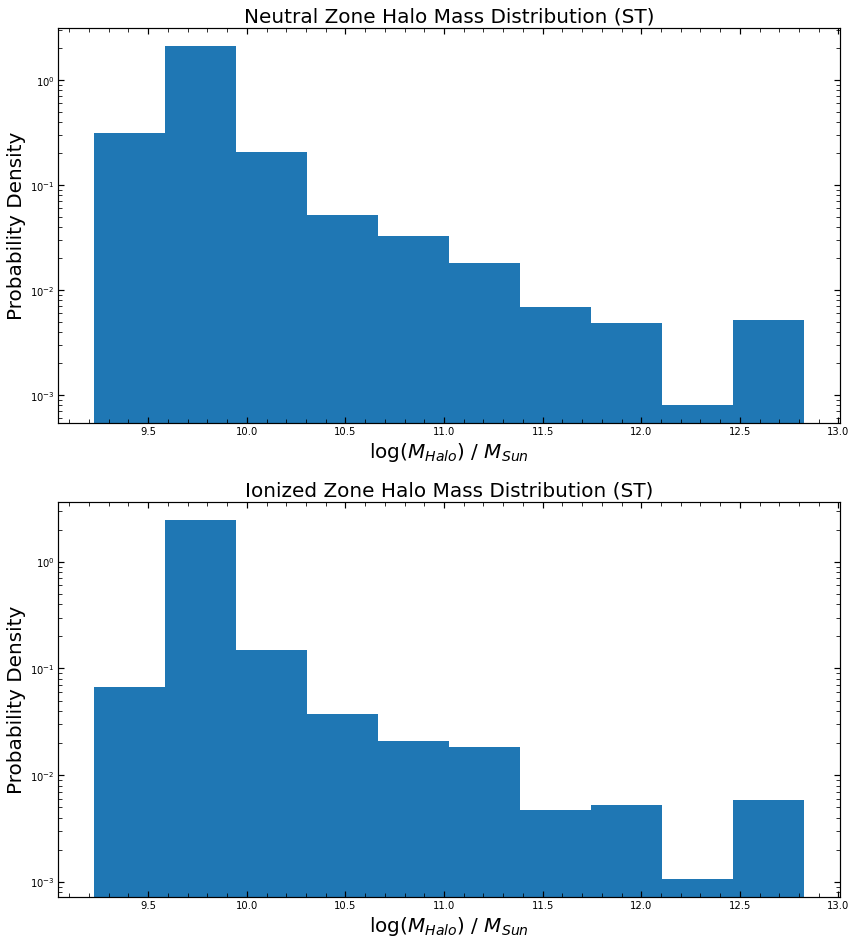

In [54]:
# Now we want to plot a histogram of the ionized and neutral halo masses

fig, ax = plt.subplots(2, figsize=(14, 16))
ax[0].hist(np.log10(neutral_halo_masses),density=True)#, bins=1000)#, density=True)
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0].set_xlabel('log($M_{Halo}$) / $M_{Sun}$', fontsize = 20)
ax[0].set_title('Neutral Zone Halo Mass Distribution (ST)', fontsize = 20)
ax[0].set_ylabel('Probability Density', fontsize = 20);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/091321/neutral_halo_mass_distribution.jpeg')
ax[1].hist(np.log10(ionized_halo_masses),density=True)#, bins=1000)#, density=True)
ax[1].set_yscale('log')
#ax[1].set_xscale('log')
ax[1].set_xlabel('log($M_{Halo}$) / $M_{Sun}$', fontsize = 20)
ax[1].set_title('Ionized Zone Halo Mass Distribution (ST)', fontsize = 20)
ax[1].set_ylabel('Probability Density', fontsize = 20);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/neutral_vs_ionized_halo_mass_distribution_sep16.jpeg')

In [107]:
# Now convert to distances and plot

neutral_dist_halo_coords = vox_to_dist(BOX_LEN, HII_DIM, neutral_halo_coords)
ionized_dist_halo_coords = vox_to_dist(BOX_LEN, HII_DIM, ionized_halo_coords)

In [96]:
slice_ionized_box = ionized.xH_box[:,:,0]
neutral_inds = np.where(slice_ionized_box == 1)
neutral_coords = np.array([[neutral_inds[0][i], neutral_inds[1][i]] for i in range(len(neutral_inds[0]))])

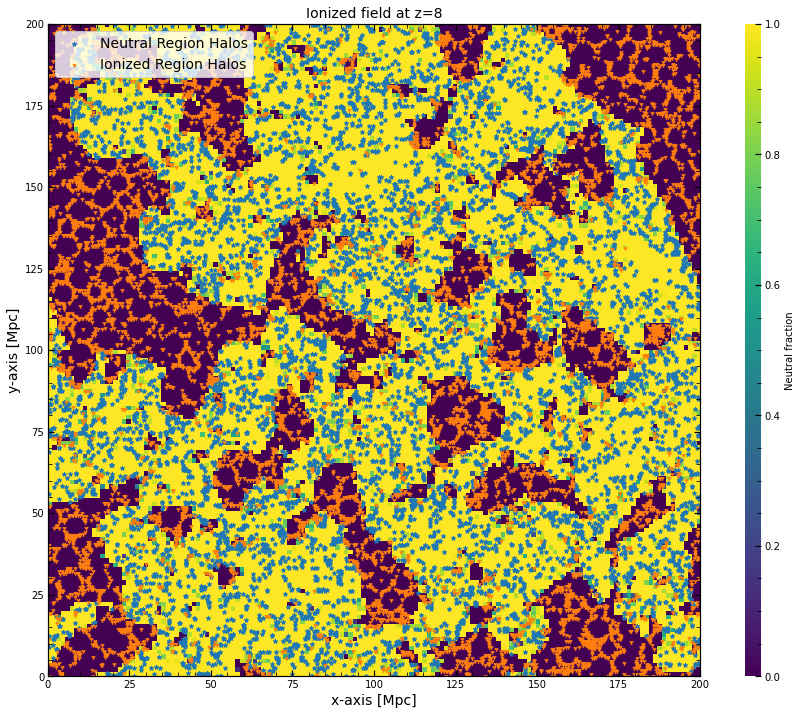

In [109]:
# Plot to verify it is only picking up the halos in neutral voxels

fig, ax = plt.subplots(figsize=(16, 12))
#halo_dist_neutral = vox_to_dist(200, 150, np.array(halo_coords_neutral))
ax.scatter(neutral_dist_halo_coords[:,0], neutral_dist_halo_coords[:,1], s=20,  marker='*', label = 'Neutral Region Halos')
ax.scatter(ionized_dist_halo_coords[:,0], ionized_dist_halo_coords[:,1], s=20,  marker='1', label = 'Ionized Region Halos')
#print(dist_halo_coords.shape)
#ax.scatter(dist_halo_coords[:,0], dist_halo_coords[:,1], s=20,  marker='*')
#ax.set_xlim(0,50)
ax.set_ylabel('y-axis [Mpc]',fontsize=14)
ax.set_xlabel('x-axis [Mpc]',fontsize=14)
ax.legend(fontsize=14)
#ax.set_ylim(bottom=0,top=50)
ax.set_title('Ionized field at z=8', fontsize=14)
plotting.coeval_sliceplot(ionized, "xH_box",ax=ax,fig=fig);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/neutral_vs_ionized_halos.jpeg')

In [ ]:
# Plot to verify it is only picking up the halos in neutral voxels

fig, ax = plt.subplots(figsize=(16, 12))
#halo_dist_neutral = vox_to_dist(200, 150, np.array(halo_coords_neutral))
ax.scatter(neutral_halo_distance_coords[:,0], neutral_halo_distance_coords[:,1], s=20,  marker='*', label = 'Neutral Region Halos')
ax.scatter(ionized_halo_distance_coords[:,0], ionized_halo_distance_coords[:,1], s=20,  marker='1', label = 'Ionized Region Halos')
#print(dist_halo_coords.shape)
#ax.scatter(dist_halo_coords[:,0], dist_halo_coords[:,1], s=20,  marker='*')
#ax.set_xlim(0,50)
ax.set_ylabel('y-axis [Mpc]',fontsize=14)
ax.set_xlabel('x-axis [Mpc]',fontsize=14)
ax.legend()
#ax.set_ylim(bottom=0,top=50)
ax.set_title('Ionized field at z=8', fontsize=14)
plotting.coeval_sliceplot(ionized, "xH_box",ax=ax,fig=fig);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/091321/only_neutral_halos.jpeg')

In [ ]:
# Get only those halo masses which are in neutral zones

neutral_halo_masses = []
slice_halo_masses = halos.halo_masses[halos.halo_coords[:,2]==0]
for i in neutral_halo_inds:
    neutral_halo_masses += [slice_halo_masses[i]]

ionized_halo_masses = []
for i in ionized_halo_inds:
    ionized_halo_masses += [slice_halo_masses[i]]

In [ ]:
# Now we want to plot a histogram of the neutral halo masses

fig, ax = plt.subplots(2, figsize=(16, 12))
ax[0].hist(neutral_halo_masses, bins=1000)#, density=True)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel('$M_{Sun}$', fontsize = 14)
ax[0].set_title('Neutral Zone Halo Mass Distribution (ST)', fontsize = 14)
ax[0].set_ylabel('Number of Halos', fontsize = 14);
#fig.savefig('/Users/jacobkennedy/Desktop/PHYS_459/091321/neutral_halo_mass_distribution.jpeg')
ax[1].hist(ionized_halo_masses, bins=1000)#, density=True)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('$M_{Sun}$', fontsize = 14)
ax[1].set_title('Ionized Zone Halo Mass Distribution (ST)', fontsize = 14)
ax[1].set_ylabel('Number of Halos', fontsize = 14);

In [ ]:
def get_neutral_halo_masses(neutral_halo_dist_coords, all_halo_dist_coords, all_halo_masses):
    neutral_halo_masses = []
    for i in range(len(all_halo_masses)):
        for i in range(len(neutral_halo_dist_coords)):
        if all_halo_dist_coords[i] in neutral_halo_dist_coords:
            neutral_halo_masses += all_halo_masses[i]
    return neutral_halo_masses



halo_dist_coords = vox_to_dist(BOX_LEN, HII_DIM, flat_halo_coords)
slice_halo_masses = halos.halo_masses[halos.halo_coords[:,2]==0]
list_neutral_halo_masses = get_neutral_halo_masses(ionized_halo_distance_coords, halo_dist_coords, slice_halo_masses)

In [ ]:
# Now get slice of ionized box

slice_ionized_box = ionized.xH_box[:,:,0]
#non_neutral_indices = np.nonzero(slice_ionized_box)
neutral_inds = np.where(slice_ionized_box == 0)

neutral_coords_DIM = vox_to_dist(200, 50, np.array([[neutral_inds[0][i], neutral_inds[1][i]] for i in range(len(neutral_inds[0]))]))
halo_coords_2D = vox_to_dist(200, 150, list_halo_coords[list_halo_coords[:,2]==0][:,:2])
#intersection_x, neutral_ind, halo_coords_ind = np.intersect1d(neutral_coords_DIM[:,0],halo_coords_2D[:,0], return_indices=True)
halo_coords_neutral = []

for i in range(len(neutral_coords_DIM)):
    for j in range(len(halo_coords_2D)):
        if (neutral_coords_DIM[i][0] == halo_coords_2D[j][0]) and (neutral_coords_DIM[i][1] == halo_coords_2D[j][1]):
            halo_coords_neutral += [halo_coords_2D[j]]

            
    
#print(neutral_coords_DIM.shape,halo_coords_2D.shape)
#intersection = multidim_intersect(neutral_coords_DIM, halo_coords_2D)

In [ ]:
flat_halo_coords.shape[0] / (150*150)

In [ ]:
# Now we want to look at what size halos are in the ionized regions, show halo mass distribution in ionized 
# region in a histogram

# shape of the ionized.xH_box is (150, 150, 150) --> we need to convert to distance coords

print(ionized.)